In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical

# Imports for usint %%timeit cell magic
import time
from PIL import Image, ImageDraw

In [4]:
X = []
y = []
#0-eyes open
#1-eyes close
#2-no yawn
#3-yawn
for img_name in os.listdir("./gdrive/MyDrive/A_A_N/Closed"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/Closed/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(1)

for img_name in os.listdir("./gdrive/MyDrive/A_A_N/Open"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/Open/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(0)
for img_name in os.listdir("./gdrive/MyDrive/A_A_N/yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(3)

for img_name in os.listdir("./gdrive/MyDrive/A_A_N/no_yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/no_yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(2)

In [5]:
print(len(X), len(y))

2900 2900


In [6]:
X = np.array(X)
y = np.array(y)
X = X.reshape((-1, 100, 100, 1))

In [7]:
print(X.shape, y.shape)

(2900, 100, 100, 1) (2900,)


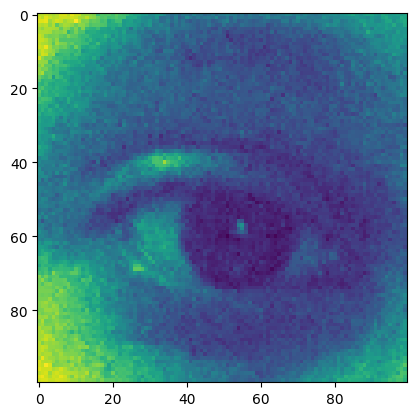

In [8]:
plt.figure()
plt.imshow(X[1000])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2320, 100, 100, 1) (2320,) (580, 100, 100, 1) (580,)


In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(100, (3, 3), activation="relu", input_shape=(100, 100, 1)),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(100, (3, 3), activation="relu"),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       1000      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       135150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 100)       135100    
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 150)       135150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 150)      0         
 2D)                                                    

In [14]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [15]:
hist = model.fit(X_train, y_train,epochs=6)

Epoch 1/6
73/73 [==============================] - 710s 10s/step - loss: 0.8126 - accuracy: 0.6065
Epoch 2/6
73/73 [==============================] - 683s 9s/step - loss: 0.4529 - accuracy: 0.7802
Epoch 3/6
73/73 [==============================] - 684s 9s/step - loss: 0.3345 - accuracy: 0.8358
Epoch 4/6
73/73 [==============================] - 678s 9s/step - loss: 0.2619 - accuracy: 0.8815
Epoch 5/6
73/73 [==============================] - 681s 9s/step - loss: 0.2069 - accuracy: 0.9125
Epoch 6/6
73/73 [==============================] - 680s 9s/step - loss: 0.1520 - accuracy: 0.9384


In [16]:
print(model.evaluate(X_test, y_test))

19/19 [==============================] - 49s 3s/step - loss: 0.2427 - accuracy: 0.9276
[0.24265721440315247, 0.9275861978530884]


In [17]:
predictions=model.predict(X_test)

19/19 [==============================] - 49s 3s/step


In [18]:
y_pred = np.argmax(predictions, axis=1)
y_pred

array([3, 3, 0, 3, 3, 0, 3, 2, 0, 2, 2, 3, 0, 0, 3, 2, 1, 2, 3, 2, 2, 3,
       3, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 3, 1, 2, 0, 0, 0, 1, 2, 1, 0, 3, 1, 0, 3, 1, 2,
       0, 1, 2, 2, 2, 2, 2, 0, 0, 3, 0, 1, 1, 2, 2, 1, 0, 3, 3, 2, 0, 2,
       3, 1, 3, 3, 0, 2, 2, 0, 2, 1, 2, 3, 0, 1, 2, 0, 2, 2, 2, 1, 3, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 3, 2, 2, 2, 1, 1, 3, 0, 1,
       1, 2, 3, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 0, 3, 2, 1, 2, 1, 2, 0, 0,
       1, 1, 2, 2, 3, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       0, 1, 2, 3, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 3, 0, 3, 1,
       3, 1, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2, 1, 0, 3, 3, 0, 2, 1, 3, 3, 1,
       2, 3, 0, 3, 0, 2, 2, 2, 1, 2, 2, 0, 3, 0, 1, 3, 2, 2, 0, 2, 0, 0,
       2, 1, 1, 3, 1, 3, 0, 3, 0, 2, 3, 2, 3, 0, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 2, 3, 3, 1, 2, 0, 1, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 3, 2, 2, 2,
       3, 3, 3, 2, 1, 3, 3, 1, 0, 2, 3, 1, 2, 1, 2,

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       154
           1       0.98      0.98      0.98       140
           2       0.99      0.81      0.89       182
           3       0.75      0.98      0.85       104

    accuracy                           0.93       580
   macro avg       0.92      0.94      0.93       580
weighted avg       0.94      0.93      0.93       580



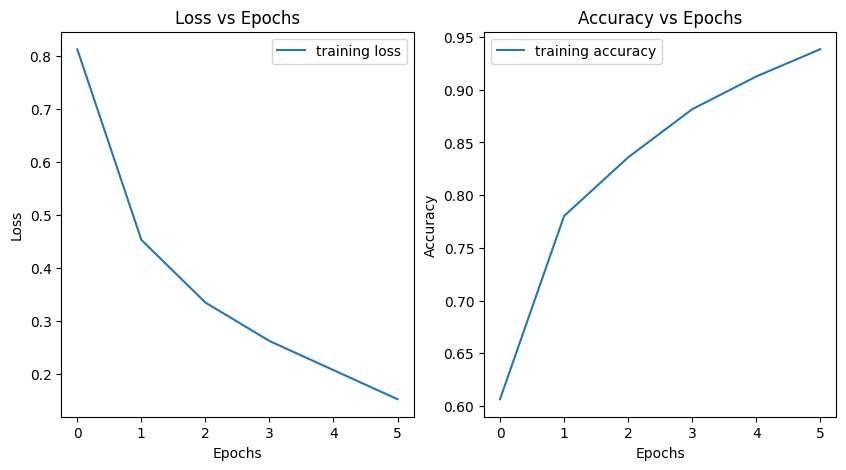

In [24]:
# Plot loss vs epochs graph sideways
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(hist.history['loss'], label='training loss')
ax1.set_title('Loss vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy vs epochs graph sideways
ax2.plot(hist.history['accuracy'], label='training accuracy')
ax2.set_title('Accuracy vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()